<b>Basic Data Visualization in Python</b><br>
In notebook we explore a sampling some basic data visualization techniques and data exploration in Python.<br>
<li>Pandas Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html
<li>Data Source: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data (test_users.csv)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.getcwd()
os.chdir('/Users/mikebrennan/dropbox/Bentley/ma755')
data=pd.read_csv('test_users.csv')

<br>
We start with some basic exploration of the data.
<br>

In [5]:
##Show the first five rows / first 8 columns. 
#Equal to R: data[1:5,1:9]
data.iloc[0:5,0:8]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0


In [6]:
##See the top five rows / last columns.
data.iloc[0:2,9:]

,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,direct,direct,untracked,Moweb,iPhone,Mobile Safari


In [11]:
#Check the counts for the Strings in the 'Gender' Variable.
#Equal to R's summary(as.factor(data$gender))
data['gender'].value_counts()

Web        37201
iOS        15574
Android     5065
Moweb       4256
Name: signup_app, dtype: int64

In [12]:
#Check the counts for the Strings in the 'Sign_up' Variable.
data['signup_app'].value_counts()

Web        37201
iOS        15574
Android     5065
Moweb       4256
Name: signup_app, dtype: int64

In [13]:
#Top 5 and bottom 5 age counts. 
#The append() function in Python act's like R's rbind() here.
data['age'].value_counts().head(5).append(data['age'].value_counts().tail(5))

28      1748
27      1724
26      1701
25      1690
29      1684
108        1
1931       1
1930       1
1926       1
2002       1
Name: age, dtype: int64

In [15]:
#There appears to be instances in the data where the Year is present instead of the Age.
#The data was gather in 2014.  We can convert these year's to age using the following function.
data['age']=data['age'].apply(lambda x: x if x<1900 else 2014-x)
data['age'].value_counts().head(5).append(data['age'].value_counts().tail(5))

28     1748
27     1724
26     1701
25     1690
29     1684
1         2
108       1
15        1
14        1
12        1
Name: age, dtype: int64

### Frequency Chart
The following code generates a distribution of the age variable.  Note that there appears to be an odd spike around the age = 100 mark.  If this was a formal data mining project we would likely question the validity of those ages and explore the cause behind them.  

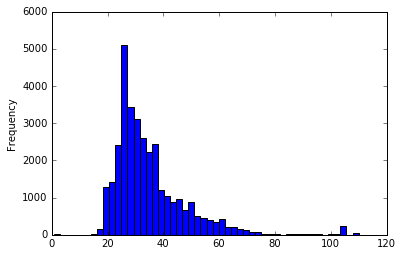

In [16]:
data['age'].plot(kind='hist',bins=50)

### Line Graph.

We can create a simple line chart by using the ```plot()``` command with no parameters.  
<br>
We use the ```value_counts()``` function to get the number of records associated with each creation date.  This allows us to the see the weekly seasonality that exists in the data. 


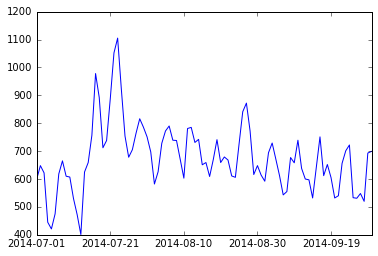

In [17]:
data['date_account_created'].value_counts().sort_index(axis=0).plot()

### Bar Graph
We can use the ```to_datetime``` function within ```pandas``` to convert the ```date_account_created``` variable from a string to a date.  
<br>
From there, ```.dt.weekday``` is used to extract the weekday.  A value from 0 to 6 is provided.  Monday = 0, Sunday = 6.
<br>
Finally, ```value_count().sort_index(0)``` is used to get the counts per weekday and sort them in order of weekday (0 throuh 6)

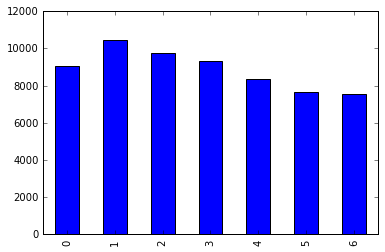

In [18]:
#Bar Graph
#Looks like Monday is the top day for signups in this data set. 
data['date_account_created']=pd.to_datetime(data['date_account_created'])
data['weekday']=data['date_account_created'].dt.weekday
data['weekday'].value_counts().sort_index(0).plot(kind='bar')

### Density Chart
A density plot can be created using the ```kind='kde'``` parameter within the ```plot()``` function.  The distribution plot below shows that the distribution of age is nearly identical for males and females in the dataset. 

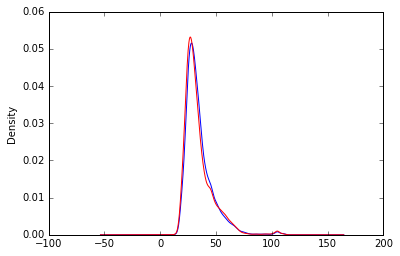

In [28]:
male= data[data['gender']=='MALE']
female= data[data['gender']=='FEMALE']
unknown= data[data['gender']=='-unknown-']

male['age'].plot(kind='kde')
female['age'].plot(kind='kde',color='red')
unknown['age'].plot(kind='kde',color='green')

### Area Plot
An area plot can be created using ```kind='area'``` within the parameters section of the ```plot()``` command.  The ```alpha``` parameter is used to control transparancy of the two distributions.  It ranges from 0 to 1.  
<br>
This plot shows that the vast majority of Chrome users (blue) are young while the IE users (red) are more evenly spread out over all ages. 


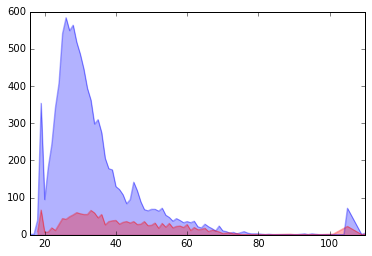

In [20]:
Chrome= data[data['first_browser']=='Chrome']
IE= data[data['first_browser']=='IE']
Chrome['age'].value_counts().sort_index(axis=0).plot(kind='area',alpha=0.3)
IE['age'].value_counts().sort_index(axis=0).plot(kind='area',color='red',alpha=0.3)


### Box Plot
In this section we create a boxplot and compare the default output to an output which has been manipulated using a tutorial from: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/.

/Users/mikebrennan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


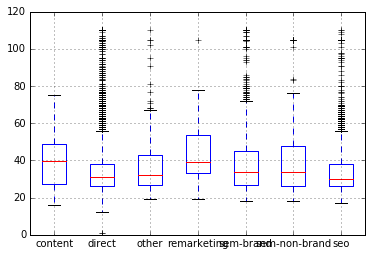

In [48]:
bp=data.pivot(values='age',columns='affiliate_channel').boxplot()

An instance of a ```boxplot``` object contains ```boxes```, ```whiskers```, ```caps```, ```medians```, and ```fliers```.  All of which can be manipulated in terms of size, color, and shape.
<br><br>We also implement a ```figure``` object which allows us to control the width and height of the plot.  It can also be used to control the layout of the plots in the event we were to add multiple plots on the same page.  

/Users/mikebrennan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


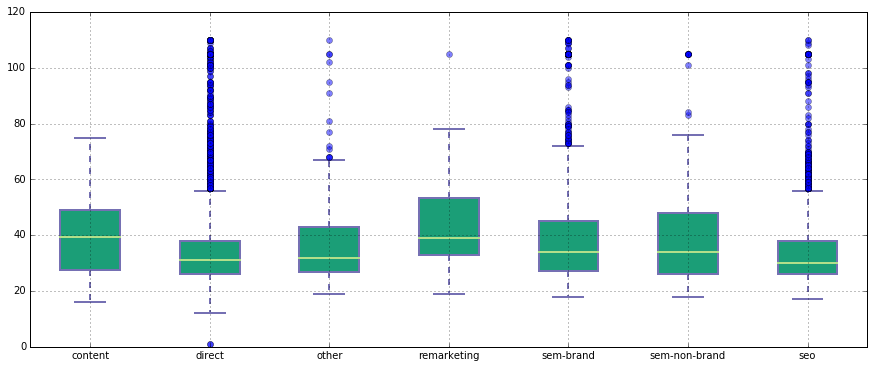

In [47]:
#plt.figure allows us to control the number of plots and the layouts/sizes of those plots
fig = plt.figure(1, figsize=(15, 6))
bp=data.pivot(values='age',columns='affiliate_channel').boxplot(patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    box.set( facecolor = '#1b9e77' )
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)


#data.pivot(values='age', columns='gender').boxplot()